Решить задачу Коши со значениями шага 0.1 и 0.01.  
x^4*y'' + 2x^3 * y'+ y = 0, y(1) = 1, y'(1) = 2, 1 <= x <= 2  
z = y' => z' = -(2 * x ** 3 * z + y) / x ** 4

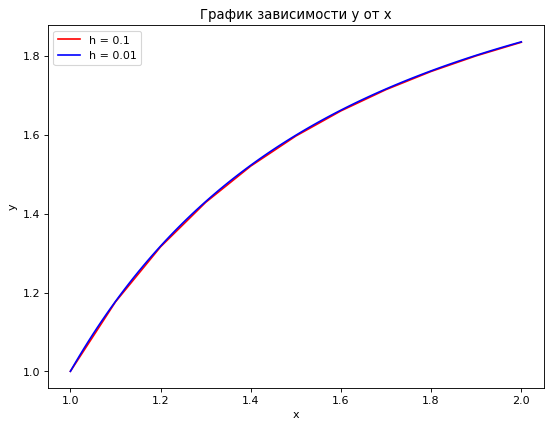

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y, z): 
    return -(2 * x ** 3 * z + y) / x ** 4

def g(x, y, z):
    return z

def Runge_Kutta(arr_x, h):
    arr_z = np.zeros(len(arr_x))
    arr_z[0] = 2
    arr_y = np.zeros(len(arr_x))
    arr_y[0] = 1
    for i in range(1, len(arr_x)):
        k1 = f(arr_x[i-1], arr_y[i-1], arr_z[i-1])
        q1 = g(arr_x[i-1], arr_y[i-1], arr_z[i-1])
        k2 = f(arr_x[i-1] + h/2, arr_y[i-1] + q1 * h / 2, arr_z[i-1] + k1 * h / 2)
        q2 = g(arr_x[i-1] + h/2, arr_y[i-1] + q1 * h / 2, arr_z[i-1] + k1 * h / 2)
        k3 = f(arr_x[i-1] + h/2, arr_y[i-1] + q2 * h / 2, arr_z[i-1] + k1 * h / 2)
        q3 = g(arr_x[i-1] + h/2, arr_y[i-1] + q2 * h / 2, arr_z[i-1] + k1 * h / 2)
        k4 = f(arr_x[i-1] + h, arr_y[i-1] + q3 * h, arr_z[i-1] + k3 * h)
        q4 = g(arr_x[i-1] + h, arr_y[i-1] + q3 * h, arr_z[i-1] + k3 * h)
        
        arr_z[i] = arr_z[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6
        arr_y[i] = arr_y[i-1] + h*(q1 + 2*q2 + 2*q3 + q4)/6
        
    return (arr_y, arr_z)

h1, h2 = 0.1, 0.01
x_arr1, x_arr2 = np.arange(1, 2+h1, h1), np.arange(1, 2+h2, h2)



y_arr1, z_arr1 = Runge_Kutta(x_arr1, h1)
y_arr2, z_arr2 = Runge_Kutta(x_arr2, h2)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_arr1, y_arr1, 'r', x_arr2, y_arr2, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title("График зависимости y от x")
plt.legend(("h = 0.1", "h = 0.01"))

In [5]:
print("x = ", x_arr1)
print("y = ", y_arr1)
print("y' = ", z_arr1)

x =  [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
y =  [1.         1.17628663 1.31618573 1.42893634 1.52108869 1.59736296
 1.66121677 1.71522311 1.76132522 1.80101109 1.83543478]
y' =  [2.         1.57328617 1.25781033 1.02058167 0.83924296 0.69848423
 0.58766898 0.4992907  0.42796806 0.3697844  0.32184799]


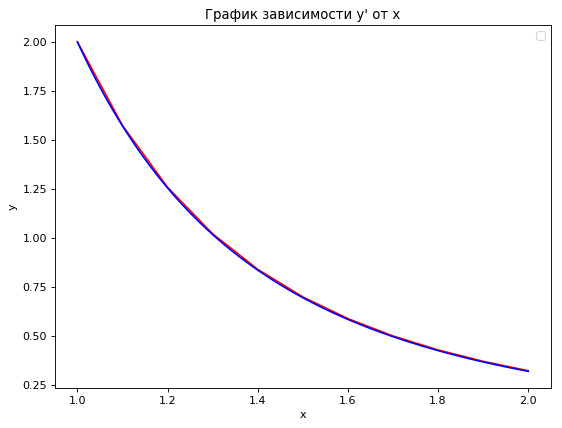

In [9]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(("red: h = 0.1", "blue: h = 0.01"))
plt.title("График зависимости y' от x")
plt.plot(x_arr1, z_arr1, 'r', x_arr2, z_arr2, 'b')

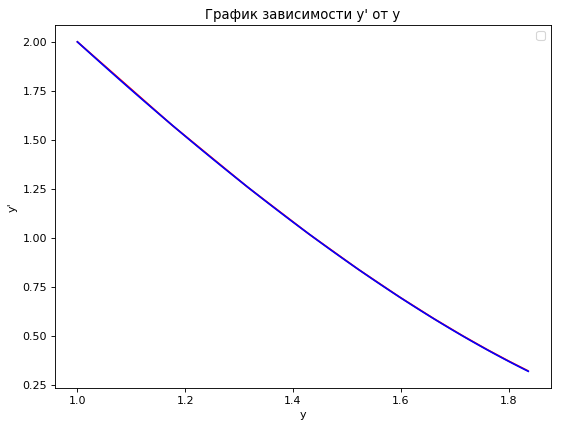

In [10]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("y")
plt.ylabel("y'")
plt.legend(("h = 0.1", "h = 0.01"))
plt.title("График зависимости y' от y")
plt.plot(y_arr1, z_arr1, 'r', y_arr2, z_arr2, 'b')